In [1]:
###Group members : Jason Hipkins, Naman Mital

import pandas as pd

data = pd.read_table( "Project 3\gap.tsv")
data.head()

#ex2 = pd.concat([data['year'], data['lifeExp']],axis=1)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [2]:
#ex1
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="year", y="lifeExp", data=data)

### Question 1
#### There is a postive linear relationship. As year increases, the spread lifeExp of moves higher

c:\users\jasonhipkins\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


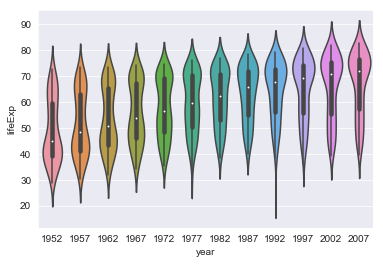

In [3]:
sns.set_style("darkgrid")
sns.violinplot(x="year", y="lifeExp", data=data)

### Question 2
#### It is skewed to younger ages in the 50s to 60s when it begins to have a more symmetry shape by 67. 
#### Then after that it skews towards older ages.This is consistent with the advent of modern medicine due to application of electronics and computers.
#### It is unimodal. 

### Question 3
#### I will reject the null hypothesis of no relationship since there is clearly a linear relationship.

### Question 4
#### A violin plot accounts for probability density at each year, it shows a full distribution of the data. A plot of the residuals would most likely follow the same skew, but have a decreasing trend as better predictions should be skewed to later years since there is higher density for older ages.

### Question 5
#### A linear regression model should minimize the square of the residuals.

In [4]:
## Exercise 2
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()
e2_X = [[x] for x in data['year'].values]
e2_Y = [[y] for y in data['lifeExp'].values]
reg.fit(e2_X, e2_Y)
ex2_y_pred = reg.predict(e2_X)
reg.coef_

array([[0.32590383]])

c:\users\jasonhipkins\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


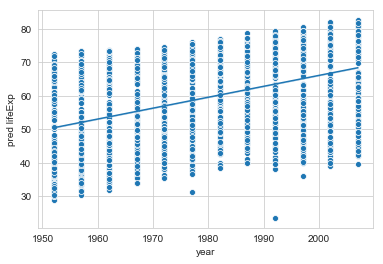

In [5]:
#ex2
ex2_y_pred_ds = pd.Series((v[0] for v in ex2_y_pred))
ex2_y_ds = pd.Series((v[0] for v in e2_Y))
ex2_X_ds = pd.Series((v[0] for v in e2_X))

ex2_df = pd.concat([ex2_X_ds, ex2_y_ds, ex2_y_pred_ds], axis=1)
ex2_df['residuals'] = ex2_df[1] - ex2_df[2]
ex2_df.rename(columns={0: 'year', 1: 'lifeExp', 2: 'pred lifeExp'}, inplace=True)
#ex2_df

sns.set_style("whitegrid")
sns.scatterplot(x="year", y="lifeExp", data=ex2_df)
sns.lineplot(x="year", y="pred lifeExp", data=ex2_df)

### Question 6
####  0.326 years per person

### Question 7
#### Yes I reject the null hypothesis bc we have shown there is an increasing linear relationship b/w year and lifeExp

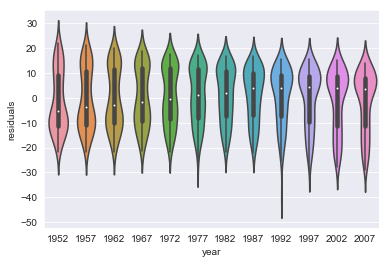

In [6]:
#ex3
sns.set_style("darkgrid")
sns.violinplot(x="year", y="residuals", data=ex2_df)

### Question 8
#### Yes it does. The raw data skew means there are bound to be some from the decreasing residuals from the predicted data  

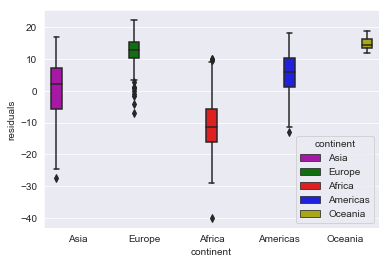

In [7]:
#ex4
#data['pred lifeExp'] = ex2_df['pred lifeExp']
data['residuals'] = ex2_df['residuals']
data
data_asia = data[data.continent == 'Asia']
data_africa = data[data.continent == 'Africa']
data_europe = data[data.continent == 'Europe']
data_oceania = data[data.continent == 'Ocenia']
data_americas = data[data.continent == 'Americas']

#data.boxplot(column='residuals', by='continent')
#type(data[residuals])
#sns.boxplot(data.residuals, groupby=data.continent)
sns.set_style("darkgrid")
sns.boxplot(x="continent", y="residuals",
            hue="continent", palette=["m", "g", "r", "b", "y"],
            data=data)

### Question 9
#### Since the continents residuals are not centered, each continet has a different mean residual. Therefore there is a depedence b/w model residual and continent. Asia and the americas have similar residuals means, but the others do not. The others on average have larger ranges of residuals, so when preforming a regression the line would be more accurate when looking at America or Asias data, but other continents would not have as a accurate of a fit.

c:\users\jasonhipkins\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


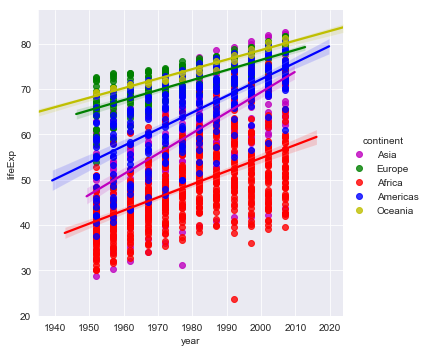

In [9]:
#ex5
sns.set_style("darkgrid")
sns.lmplot(x = "year", y ="lifeExp", 
           hue="continent", palette=["m", "g", "r", "b", "y"], 
           data=data, scatter=True, fit_reg=True, sharex=False)

### Question 10
#### Yes since the coefficients for the linear models of each continet are different. It would be better to include a term for year and continent to account for the different coefficients. This will give us a more accurate fit for our model.


In [8]:
#Exercise 6
import statsmodels.api as smf
from statsmodels.formula.api import ols
temp = data['continent'].values
temp2 = []
for x in temp:
    if x == 'Africa': 
        temp2.append(1)
    elif x == 'Americas':
        temp2.append(2)
    elif x == 'Asia':
        temp2.append(3)
    elif x == 'Europe':
        temp2.append(4)
    else:
        temp2.append(5)
data['continent_index'] = pd.Series(temp2, index = data.index)
res = ols(formula='lifeExp ~ year + continent_index + year * continent', data=data).fit()


#for exercise 7
mod2 = ols(formula='lifeExp ~ year', data=data)
res2 = mod2.fit()
data.loc[:,'residOLS'] = res2.resid


res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Wed, 28 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:04:22   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -521.4943     47.441    -10.993      0.000    -614.543    -428.446
continent[T.Americas]       -136.0849     56.099     -2.426      0.015    -246.115     -26.055
continent[T.Asia]           -307.1060     57.962     -5.298      0.000    -420.791    -193.421
continent[T.Europe]          165.1374     71.080      2.323      0.020      25.723     304.552
continent[T.Oceania]         193.4039     86.527      2.235      0.026      23.692     363.116
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
continent_index               -2.7635     23.512     -0.118      0.906     -48.880      43.353
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     8.55e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Question 11
#### Significant parameters are the t values. Low t values have higher p values. The larger the t value, the more statistifcally significant. The countries that are significantly different from zero would possibly be from asia, since the continent and year value are significantly different from 0.

### Question 12
#### Answer is in the next 2 cells

In [11]:
yearEst = res.params['year']
americasEst = res.params['year:continent[T.Americas]']
asiaEst = res.params['year:continent[T.Asia]']
eurEst = res.params['year:continent[T.Europe]']
oceanEst = res.params['year:continent[T.Oceania]']
#africaEst = res.params['year:continent[T.Africa]']

df = pd.DataFrame(index=['Life Expectancy Increase Per Year'], data={'Americas': [yearEst+americasEst], 'Asia': [yearEst+asiaEst], 'Europe':[yearEst+eurEst], 'Oceania': [yearEst+oceanEst]})
df = df.T
df

,Life Expectancy Increase Per Year
Americas,0.367651
Asia,0.453122
Europe,0.221932
Oceania,0.210272


In [10]:
#Exercise 7: 
import statsmodels.api as sm
aov_table = sm.stats.anova_lm(res)
aov_table2 = sm.stats.anova_lm(res2) #from exercise 2
aov_table #from curr prob

,df,sum_sq,mean_sq,F,PR(>F)
continent,4.0,139343.165924,34835.791481,675.811593,0.000000e+00
year,1.0,53919.184217,53919.184217,1046.027900,4.048499e-179
year:continent,4.0,3566.089198,891.522300,17.295462,6.463379e-14
continent_index,1.0,9.658395,9.658395,0.187372,6.651680e-01
Residual,1694.0,87319.944414,51.546602,NaN,NaN


In [12]:
aov_table2

,df,sum_sq,mean_sq,F,PR(>F)
year,1.0,53919.184217,53919.184217,398.604746,7.546795e-80
Residual,1702.0,230229.199536,135.269800,NaN,NaN


### Question 13:
#### Yes, because the sqaured sum of residuals for the interaction is much smaller. This means the regression is a much better fit (closer to) of actual values. So the interaction model has a more accurate model of global lifeExp change

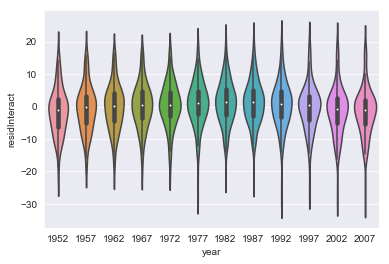

In [19]:
#Exercise 8: 
data.loc[:,'residInteract'] = res.resid
sns.violinplot(x="year", y="residInteract", data=data)

#### The residuals seem to be more centered around zero, meaning the match the model better.

## Part 2

In [21]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

# simulate data for linear regression
import sklearn.datasets
gen_data_x, gen_data_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)

#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

In [22]:
#Problem 1
import pandas as pd
import numpy as np

# Training data (X, y), T time steps, alpha step
def grad_descent(X, y, T, alpha):
    m, n = X.shape         # m = #examples, n = #features
    theta = np.zeros(n)    # initialize parameters
    f = np.zeros(T)        # track loss over time
    for i in range(T):
        # loss for current parameter vector theta
        f[i] = 0.5*np.linalg.norm(np.dot(X,theta) - y)**2
        # compute steepest ascent at f(theta)
        g = X.T.dot(X.dot(theta) - y)
        # step down the gradient
        theta = theta - alpha*g
    return theta, f

### Problem 2
$$ B^{k+1} = B^k + \alpha \sum_{i=1}^{n} [y_i - (\frac{e^{B^k * x_i}}{1 + e^{B^k * x_i}})] x_i $$

In [23]:
#problem 3
import numpy as np
import math as m
def log_grad_descent(X, Y, alpha, K, N):

    #initialize weights and loss
    theta2 = np.zeros(len(X[0]))
    loss = np.zeros(N)
    gradient = 0
    for k in range(K):
        
        #compute loss and gradient by taking partial derivative of our loss function with respect to our weights theta
        for i in range(N):
            loss[i] = compute_loss(X[i], Y[i], theta2)
            gradient = loss[i] * X[i]

        #update theta by taking a step in direction of gradient
        theta2 = theta2 + alpha * gradient
        theta2 = theta2/np.linalg.norm(theta2)
    return theta2, loss
def compute_loss(x, y, theta):
    return y - (m.exp(np.dot(theta, x)))/(1+m.exp(np.dot(theta, x)))

theta2, f2 = log_grad_descent(log_gen_data_x, log_gen_data_y, 20, 1, len(log_gen_data_y))


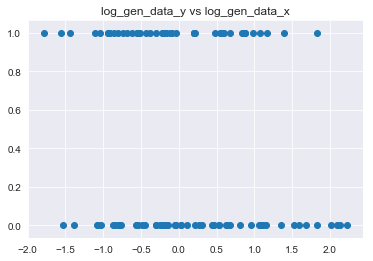

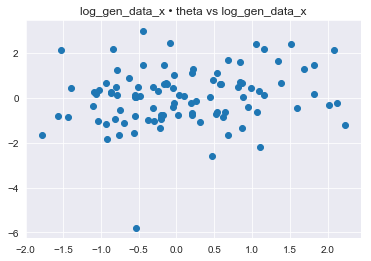

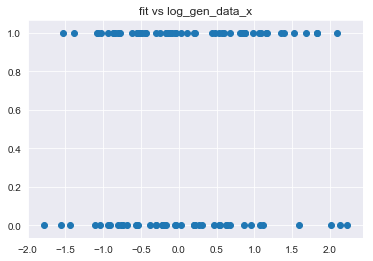

In [24]:
#problem 4
import matplotlib.pyplot as plt

plt.scatter(log_gen_data_x[:, 1][:, None], log_gen_data_y)
plt.title("log_gen_data_y vs log_gen_data_x")
plt.show()
plt.scatter(log_gen_data_x[:, 1][:, None], log_gen_data_x.dot(theta2))
plt.title("log_gen_data_x • theta vs log_gen_data_x")
plt.show()
# this is more meaningful since it shows you classify almost everything correctly
fit = [1 if i>0 else 0 for i in log_gen_data_x.dot(theta2)]
plt.scatter(log_gen_data_x[:, 1][:, None], fit)
plt.title("fit vs log_gen_data_x")
plt.show()


### Include a similar plot in your writeup and comment on how your gradient descent implementation is working.
#### The data set is logistic and the gradient descent on this logistic regession fits almost exactly. Therefore, it is working how we would expect it. 


### Find a dataset on which to try out different classification (or regression) algorithms.


In [25]:
#Show that crime can be predicted based on other classifiers
#Src: http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
#Desc: http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
#This dataset was taken from the StatLib library. Maintained by Carnegie Mellon University.
#This dataset was found as per suggestion of a friend who previously took the class.
#We classifed crime stats as 0(below mean) or 1(above mean)
#The other 13 columns are used as features of the sample for prediction. 
import requests
import re
import numpy as np

housing_data = requests.get("http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
housing_data = housing_data.text.split('\n')
split = [i.split() for i in housing_data]
housing_df = pd.DataFrame(split ,columns=['CRIM','ZN','INSUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MDEV'])
housing_df = housing_df.drop([500,501, 502, 503, 504, 505, 506])
crime_stat = pd.DataFrame(housing_df['CRIM'])
housing_df = housing_df.drop('CRIM',1)
crime_stat = crime_stat.as_matrix().flatten() #array of crime stats
crime_stat = crime_stat.astype(np.float)
housing_ndarray = housing_df
housing_ndarray = housing_ndarray.as_matrix().flatten().reshape(500,13) #array of features to predict crime
housing_ndarray = housing_ndarray.astype(np.float)

mean = np.mean(crime_stat)

crime_stat_labels = np.array([1 if x >= mean else 0 for x in crime_stat])

rand_permute = np.random.permutation(len(crime_stat_labels))
housing_ndarray = housing_ndarray[rand_permute, :]
crime_stat_labels = crime_stat_labels[rand_permute]
#housing_df

c:\users\jasonhipkins\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\jasonhipkins\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


### Choose two: classification (or regression) trees, random forests

In [26]:
#1 random forests
from sklearn import linear_model
X = housing_ndarray
y = crime_stat_labels

RFC = RandomForestClassifier(n_jobs=-1)
RFCfit = RFC.fit(X, y)

scoresRFC = cross_val_score(RFC, X, y, cv=10)
print("average error for RandomForestClassifier: " + str(scoresRFC.mean()))
print("standard error for RandomForestClassifier: " + str(scoresRFC.std() / np.sqrt(10)))

c:\users\jasonhipkins\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


average error for RandomForestClassifier: 0.9879983993597439
standard error for RandomForestClassifier: 0.00419592237902065


In [27]:
#2 Decision Tree Classifier 
from sklearn import tree

DTC = tree.DecisionTreeClassifier()
# cross validation score of Decision Tree Classifier 
scoresDTC = cross_val_score(DTC, X, y, cv=10)
print("average error for DecisionTreeClassifier: " + str(scoresDTC.mean()))
print("standard error for DecisionTreeClassifier: " + str(scoresDTC.std()  / np.sqrt(10)))

average error for DecisionTreeClassifier: 0.9879167667066826
standard error for DecisionTreeClassifier: 0.004250750385055357


#### Compare their prediction performance on your chosen dataset to your logistic regression gradient descent implementation using 10-fold cross-validation and a paired t-test (one for each of the two algorithms vs. your logistic regression code). Note: for those algorithms that have hyper-parameters, i.e., all of the above except for LDA, you need to specify in your writeup which model selection procedure you used.

In [28]:
y = crime_stat_labels
log_accuracy = np.zeros(10)
valid_size = (int) (len(y) / 10)
for i in range(0, 10):
    indices = np.ones(len(y), dtype=bool)

    #get indices for the different folds
    indices[i*valid_size:(i+1)*valid_size] = 0
    Xtrain = X[indices,:]
    Ytrain = y[indices]
    Xtest = X[np.logical_not(indices),:]
    Ytest = y[np.logical_not(indices)]
    
    #train model
    theta, _ = log_grad_descent(Xtrain, Ytrain, 20, 1, len(Ytrain))
    
    #test model
    Ypred = Xtest.dot(theta)
    Ypred_label = np.array([1 if i>0 else 0 for i in Ypred])    
    num_errors = np.sum(Ypred_label == Ytest)
    log_accuracy[i] = 1 - num_errors / len(Ytest)

print("average error for logistic gradient descent algorithm: " + str(log_accuracy.mean()))
print("standard error for logistic gradient descent algorithm: " + str(log_accuracy.std() / np.sqrt(10)))


average error for logistic gradient descent algorithm: 0.304
standard error for logistic gradient descent algorithm: 0.04781631520725954


In [29]:
from scipy.stats import *

#paired t-test for random forests vs logistic regression
t_RFCvsLog = stats.ttest_rel(scoresRFC, log_accuracy)

#paired t-test for decision tree classifier vs logistic regression
t_DTCvsLog = stats.ttest_rel(scoresDTC, log_accuracy)

#Create nice dataframe to show T scores and pvals 
index = ['T_Statistic','P_Value']
RFvLog = [t_RFCvsLog.statistic, t_RFCvsLog.pvalue]
DTCvLog = [t_DTCvsLog.statistic, t_DTCvsLog.pvalue]
df = pd.DataFrame.from_records({"RFC vs Log_Grad_Desc T_Test":RFvLog, "DTC vs Log_Grad_Desc T_Test":DTCvLog}, index=index)
df

,DTC vs Log_Grad_Desc T_Test,RFC vs Log_Grad_Desc T_Test
T_Statistic,1.326043e+01,1.381450e+01
P_Value,3.274448e-07,2.301218e-07


#### 1. Describe the dataset you are using, including: what is the outcome you are predicting (remember this should be a classification task) and what are the predictors you will be using.

##### This data was taken from StatLib library. We used crime stats and classified them as 1 (above mean) or 0 (below mean). The other columns were used as features of the sample we tried to predict. We want to show crime stats can be predicted based on other classifers.

#### 2. Include code to obtain and prepare your data as a dataframe to use with your three classification algorithms. In case your dataset includes non-numeric predictors, include the code you are using to transform these predictors into numeric predictors you can use with your logistic regression implementation.

##### In our code you can see we bound the crime rate by the mean of the entire column, such that it is classifed 1 or 0. (for a logit model) The other date is the same.

#### 3. Specify the two additional algorithms you have chosen in part (b), and for algorithms that have hyper-parameters specify the method you are using for model selection.</b>

##### We used DecisionTreeClassifier and RandomForestClassifier algorithms. We used default hyper parameter values.

#### 4. Include all code required to perform the 10-fold cross-validation procedure on your three algorithms.</b>
##### Code is above. 

#### 5. Writeup the result of your 10-fold cross-validation procedure. Make sure to report the 10-fold CV error estimate (with standard error) of each of the three algorithms. Also report on the result of the two paired t-tests comparing your logistic regression algorithm with your chosen two algorithms.

#### results from the last run:
##### The result of the 10-fold cross-validation for the Random Forest Classifier
##### average error of 0.9880392156862745
##### standard error of 0.004187915828309566.

##### results of the 10-fold cross-validation for the Decision Tree Classifier
##### average error of 0.990078431372549
##### standard error of 0.005053211661595604.

##### results of the 10-fold cross-validation for the logistical gradient descent algorithm 
##### average error of 0.676
##### standard error of 0.05739686402583332.

#### The t test results show that random forest and decision tree algorithms are significantly better than the logistic regression at classification.
